In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

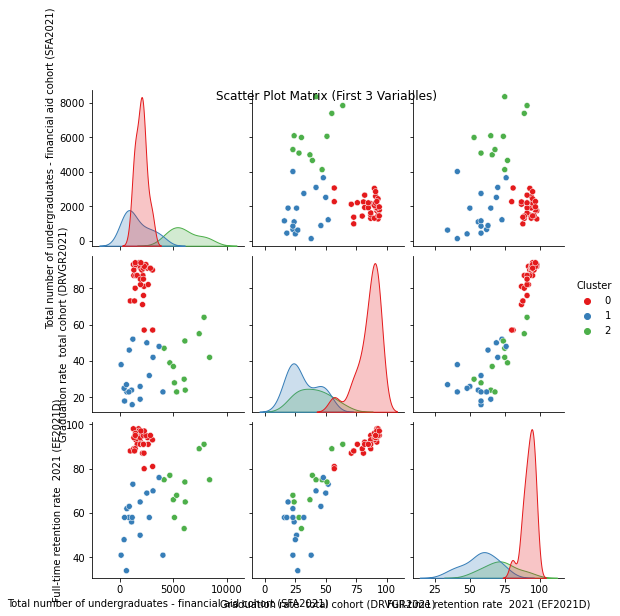

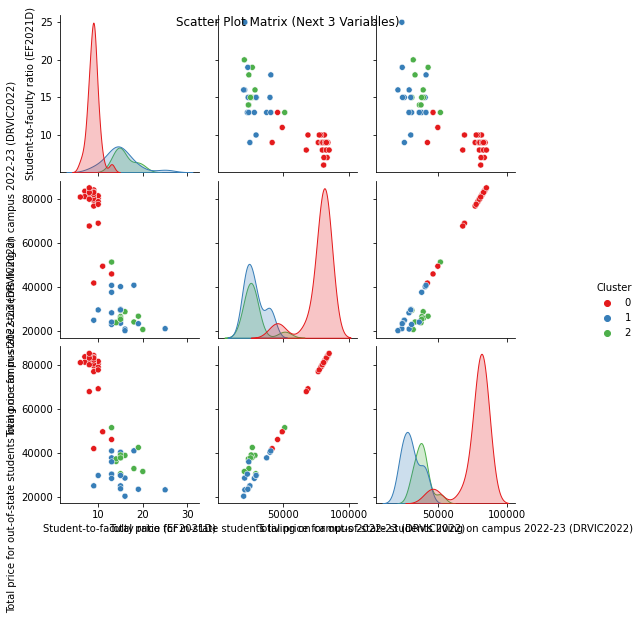

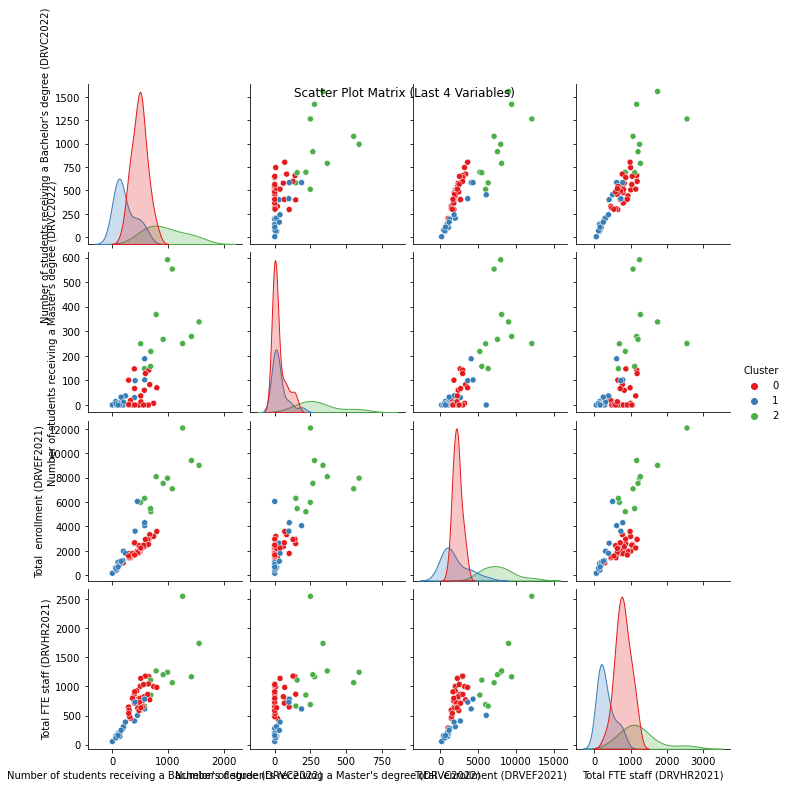

Cluster for Fisk University:
    UnitID                Institution Name  \
2   217624                Allen University   
7   132602      Bethune-Cookman University   
11  201690        Central State University   
13  138947        Clark Atlanta University   
14  217891                 Clinton College   
20  158802              Dillard University   
21  220181                 Fisk University   
30  220598                    Lane College   
31  207209             Langston University   
33  177940              Lincoln University   
34  198862             Livingstone College   
37  218399                  Morris College   
45  199643                 Shaw University   
54  234155       Virginia State University   
57  206491          Wilberforce University   
58  229887                   Wiley College   
60  160904  Xavier University of Louisiana   

    Total number of undergraduates - financial aid cohort (SFA2021)  \
2                                                 653                 


ValueError: too many values to unpack (expected 2)

<Figure size 720x576 with 0 Axes>

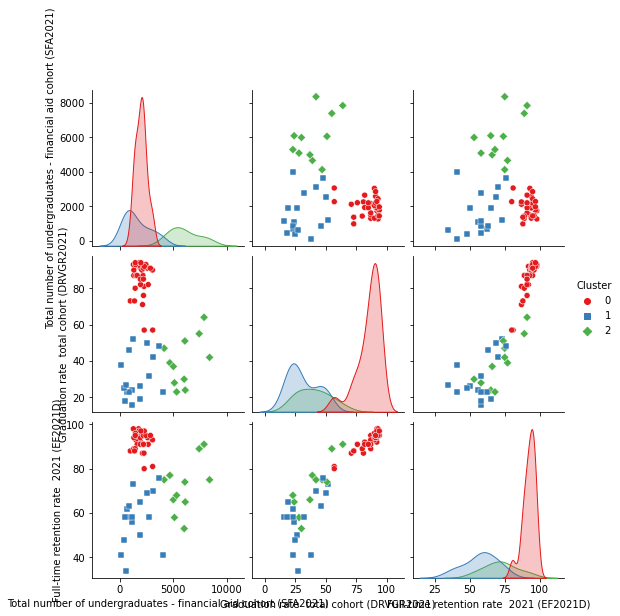

In [3]:
#Load the data from the CSV file
data = pd.read_csv('Lab_6_Data.csv')

#Set Fisk University as the reference institution
fisk_university = data[data['Institution Name'] == 'Fisk University']

#Select all 10 relevant features for clustering
features = [
    'Total number of undergraduates - financial aid cohort (SFA2021)',
    'Graduation rate  total cohort (DRVGR2021)',
    'Full-time retention rate  2021 (EF2021D)',
    'Student-to-faculty ratio (EF2021D)',
    'Total price for in-state students living on campus 2022-23 (DRVIC2022)',
    'Total price for out-of-state students living on campus 2022-23 (DRVIC2022)',
    "Number of students receiving a Bachelor's degree (DRVC2022)",
    "Number of students receiving a Master's degree (DRVC2022)",
    "Total  enrollment (DRVEF2021)",
    "Total FTE staff (DRVHR2021)"
]

#Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

#Fit KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

#Create scatter plots for the standardized features (3, 3, and 4 variables)
#You may need to adjust the 'vars' argument based on your choice of variables.
sns.pairplot(data, vars=features[:3], hue='Cluster', palette='Set1')
plt.suptitle("Scatter Plot Matrix (First 3 Variables)")
plt.show()

sns.pairplot(data, vars=features[3:6], hue='Cluster', palette='Set1')
plt.suptitle("Scatter Plot Matrix (Next 3 Variables)")
plt.show()

sns.pairplot(data, vars=features[6:], hue='Cluster', palette='Set1')
plt.suptitle("Scatter Plot Matrix (Last 4 Variables)")
plt.show()

#Create dataframes for each cluster
cluster_fisk = data[data['Cluster'] == data[data['Institution Name'] == 'Fisk University']['Cluster'].values[0]]
cluster_aspirant = data[data['Cluster'] == 1]
cluster_below_fisk = data[data['Cluster'] == 2]

print("Cluster for Fisk University:")
print(cluster_fisk)

print("An Aspirant cluster for Fisk University:")
print(cluster_aspirant)

print("A cluster that is below Fisk University:")
print(cluster_below_fisk)

# Assuming you have a 'US News Ranking' column in your DataFrame
# Replace 'us_news_ranking' with the actual column name

# Scatter plot for the first 3 variables
plt.figure(figsize=(10, 8))
scatter = sns.pairplot(data, vars=features[:3], hue='Cluster', palette='Set1', markers=["o", "s", "D"])
for i, j in zip(*scatter.axes, features[:3]):
    scatter.data.plot.scatter(i, j, c='Rank', cmap='cool', s=100, ax=scatter.axes[i, j])

plt.suptitle("Scatter Plot Matrix (First 3 Variables)")
plt.show()

# Scatter plot for the next 3 variables
plt.figure(figsize=(10, 8))
scatter = sns.pairplot(data, vars=features[3:6], hue='Cluster', palette='Set1', markers=["o", "s", "D"])
for i, j in zip(*scatter.axes, features[3:6]):
    scatter.data.plot.scatter(i, j, c='Rank', cmap='cool', s=100, ax=scatter.axes[i, j])

plt.suptitle("Scatter Plot Matrix (Next 3 Variables)")
plt.show()

# Scatter plot for the last 4 variables
plt.figure(figsize=(10, 8))
scatter = sns.pairplot(data, vars=features[6:], hue='Cluster', palette='Set1', markers=["o", "s", "D"])
for i, j in zip(*scatter.axes, features[6:]):
    scatter.data.plot.scatter(i, j, c='Rank', cmap='cool', s=100, ax=scatter.axes[i, j])

plt.suptitle("Scatter Plot Matrix (Last 4 Variables)")
plt.show()

# Choose a variable to visualize (e.g., 'Graduation rate total cohort (DRVGR2021)')
variable_to_visualize = 'Graduation rate total cohort (DRVGR2021)'

# Calculate the average value of the variable for each cluster
cluster_avg = data.groupby('Cluster')[variable_to_visualize].mean()

# Define the clusters and their labels
clusters = ['Fisk University', 'Aspirant Cluster', 'Below Fisk University']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(clusters, cluster_avg, color=['blue', 'green', 'red'])
plt.title(f'Average {variable_to_visualize} by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average ' + variable_to_visualize)
plt.show()